## Import the data

In [1]:
import pandas as pd
import numpy as np

import re
import nltk
nltk.download('punkt')
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DK23\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Loading data

In [19]:
data = pd.read_csv('E:\\NLP\\Data\\Final_Data.csv', index_col=0)
#data
#data.info()

In [20]:
data['Title'][1] 

'punishment abduction women children'

In [21]:
data['Content'][1] 

'person human trafficking prevention suppression act act act section abovementioned offense purpose purpose woman child abduction person life imprisonment shall punishable imprisonment term not exceeding fourteen years additional fine thereof'

## Removing whoever

In [22]:
def clean_whoever(x):
    x = str(x).replace('whoever ', '')
    return x

In [23]:
data['Content'] = data['Content'].apply(lambda x: clean_whoever(x))

In [24]:
data

,Title,Content
0,punishment crimes committed substance susch co...,person kills attempts cause death child woman ...
1,punishment abduction women children,person human trafficking prevention suppressio...
2,punishment ransom,person detains woman child ransom person shall...
3,punishment rapem death due rape,man rapes woman child shall punishable death p...
4,punishment inciting women commit suicide,woman commits suicide without consent woman pe...
...,...,...
195,adulteration food drink intended sale,adulterates article food drink make article no...
196,punishment theft,commits theft shall punished imprisonment eith...
197,theft dwellinghouse etc,commits theft building tent vessel building te...
198,theft preparation made causing death hurt rest...,commits theft made preparation causing death h...


## Import for W2V

In [25]:
import pandas as pd
import gensim
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import os
import random
import re
import string

import nltk
import numpy as np
import pandas as pd

from gensim.models import Word2Vec

from nltk import word_tokenize
from nltk.corpus import stopwords

from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_samples, silhouette_score

## TBD

In [26]:
data_set = data.Content.apply(gensim.utils.simple_preprocess)
data_set

0      [person, kills, attempts, cause, death, child,...
1      [person, human, trafficking, prevention, suppr...
2      [person, detains, woman, child, ransom, person...
3      [man, rapes, woman, child, shall, punishable, ...
4      [woman, commits, suicide, without, consent, wo...
                             ...                        
195    [adulterates, article, food, drink, make, arti...
196    [commits, theft, shall, punished, imprisonment...
197    [commits, theft, building, tent, vessel, build...
198    [commits, theft, made, preparation, causing, d...
199    [clerk, servant, employed, capacity, clerk, se...
Name: Content, Length: 200, dtype: object

## W2V

In [27]:
from gensim.models import Word2Vec
model = Word2Vec(sentences=data_set, vector_size=100, workers=1, seed=25)

## Testing W2V

In [28]:
model.wv.most_similar("child")
#model.wv.similarity(w1="woman", w2="child")

[('order', 0.9992693662643433),
 ('section', 0.9992598295211792),
 ('shall', 0.9992567300796509),
 ('person', 0.9991907477378845),
 ('not', 0.9991630911827087),
 ('public', 0.9991371631622314),
 ('knows', 0.9991245865821838),
 ('purpose', 0.9991223812103271),
 ('property', 0.9991046190261841),
 ('servant', 0.9990956783294678)]

## W2V model

In [29]:
def vectorize(list_of_docs, model):
    """Generate vectors for list of documents using a Word Embedding

    Args:
        list_of_docs: List of documents
        model: Gensim's Word Embedding

    Returns:
        List of document vectors
    """
    features = []

    for tokens in list_of_docs:
        zero_vector = np.zeros(model.vector_size)
        vectors = []
        for token in tokens:
            if token in model.wv:
                try:
                    vectors.append(model.wv[token])
                except KeyError:
                    continue
        if vectors:
            vectors = np.asarray(vectors)
            avg_vec = vectors.mean(axis=0)
            features.append(avg_vec)
        else:
            features.append(zero_vector)
    return features
    
vectorized_docs = vectorize(data_set, model=model)
len(vectorized_docs), len(vectorized_docs[0])

(200, 100)

## Checking the optimal number of cluster

In [32]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,30)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(vectorized_docs)
    Sum_of_squared_distances.append(km.inertia_)

C:\Users\DK23\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


## Ploting the figure

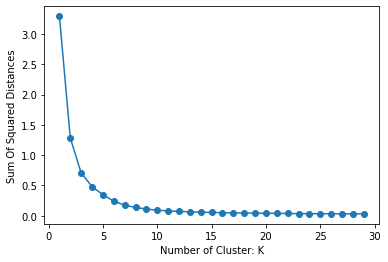

In [35]:
import matplotlib.pyplot as plt

plt.plot(K, Sum_of_squared_distances, marker='o')
plt.xlabel('Number of Cluster: K')
plt.ylabel('Sum Of Squared Distances')
plt.show()